In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math

# Messy Code

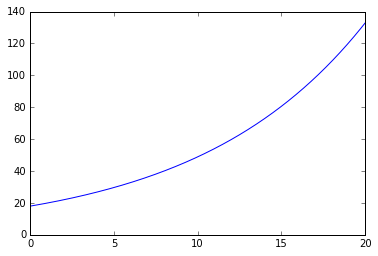

In [3]:
p = 18
r = 0.1

sim_length = 20
dt = 0.01

xs = []
ys = []

num_iter = int(sim_length / dt) + 1
for i in range(num_iter):
    xs.append(i*dt)
    ys.append(p)
    p += r * p * dt
    
plt.plot(xs, ys)

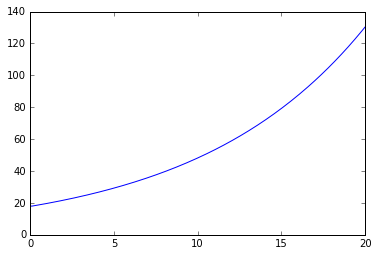

In [4]:
p = 18
r = 0.1

sim_length = 20

xs = np.linspace(0, sim_length, 200)
ys = [p]

for i in range(1, len(xs)):
    dt = xs[i] - xs[i-1]
    ys.append(p)
    p += r * p * dt
    
plt.plot(xs, ys)

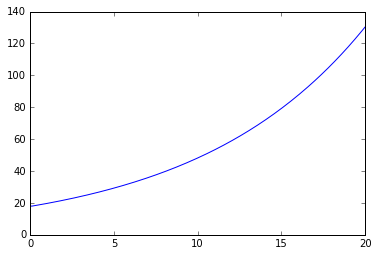

In [5]:
p = 18
r = 0.1

sim_length = 20

def growth(u, dt):
    return u * r * dt

xs = np.linspace(0, sim_length, 200)
ys = [p]

for i in range(1, len(xs)):
    dt = xs[i] - xs[i-1]
    ys.append(p)
    p += growth(p, dt)
    
plt.plot(xs, ys)

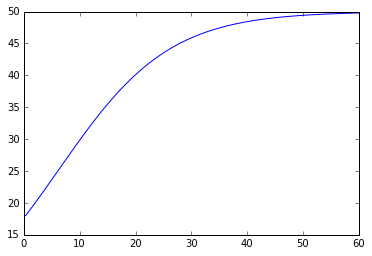

In [6]:
p = 18
r = 0.1
M = 50
sim_length = 60

def logistic(u, dt):
    return u * r * (1 - u / M) * dt

xs = np.linspace(0, sim_length, 200)
ys = [p]

for i in range(1, len(xs)):
    dt = xs[i] - xs[i-1]
    ys.append(p)
    p += logistic(p, dt)
    
plt.plot(xs, ys)

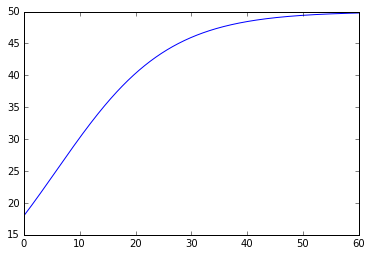

In [9]:
p = 18
r = 0.1
M = 50
sim_length = 60

def euler(func, initial, deltas):
    vals = [initial]

    for i in range(1, len(xs)):
        dt = deltas[i] - deltas[i-1]
        initial += func(initial, dt)
        vals.append(initial)
        
    return vals

def logistic(u, dt):
    return u * r * (1 - u / M) * dt

xs = np.linspace(0, sim_length, sim_length * 10)
ys = euler(logistic, p, xs)
    
plt.plot(xs, ys)

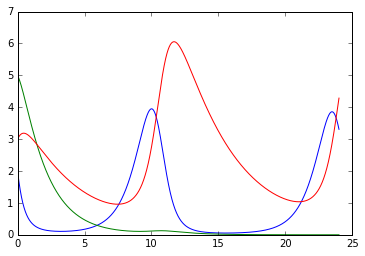

In [7]:
x = 2.0
y = 5.0
z = 3.0
a = 1.23
b = 0.35
d = 0.18
g = 0.53
n = 0.25
m = 0.28
w = 0.43

sim_length = 24

def euler(func, initial, deltas):
    vals = [initial]
    for i in range(1, len(deltas)):
        cur = np.array(vals[-1][:])
        dt = deltas[i] - deltas[i - 1]
        cur += func(cur, deltas[i]) * dt
        vals.append(cur)
    return np.array(vals)
    

def predprey(u, t):
    x, y, z = u
    dx = (a * x - b * x * y - w * z * x)
    dy = (-g * y  + d * x * y) 
    dz = (-n * z + m * z * x)
    return np.array([dx, dy, dz])

xs = np.linspace(0, sim_length, sim_length * 3000)
ys = euler(predprey, [x, y, z], xs)

plt.plot(xs, ys)

# Lorenz Eq.

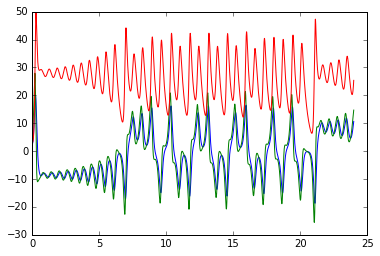

In [8]:
a = 10
p = 28
b = (8/3)

def difEq(u, t):
    x, y, z = u
    dx = (a * (y - x))
    dy = (x * (p - z))
    dz = (x*y - b*z)
    
    return np.array([dx, dy, dz])

xs = np.linspace(0, sim_length, sim_length * 3000)
ys = euler(difEq, [x, y, z], xs)

plt.plot(xs, ys)

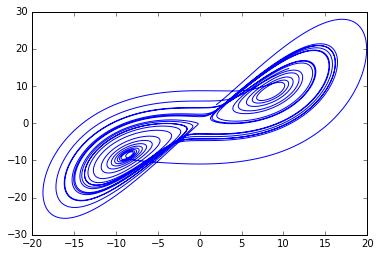

In [9]:
plt.plot(ys[:, 0], ys[:, 1])

# Runge - Kutta 2

In [10]:
def rk2(func, initial, deltas):
    vals = [initial]
    for i in range(1, len(deltas)):
        old = np.array(vals[-1][:])
        dt = deltas[i] - deltas[i - 1]
        d1 = func(old, deltas[i])
        cur = old + d1 + dt
        

# Epidemiology

SIR - SUCEPTIBLE INFECTED RECOVERED

S+I+R = N

ds/dt = (-B*s*i)/N

di/dt = (B*s*i)/N   - g*i

dr/dt = (d*i)

In [11]:
def rk4(func, initial, deltas):
    ys = [initial]
    for i in range(1, len(xs)):
        old = np.array(ys[-1][:])
        dt = xs[i] - xs[i - 1]
        d1 = np.array(func(old, xs[i])) * dt
        d2 = np.array(func(old + 0.5 * d1, xs[i] + 0.5 * dt)) * dt
        d3 = np.array(func(old + 0.5 * d2, xs[i] + 0.5 * dt)) * dt
        d4 = np.array(func(old + d3, xs[i] + dt)) * dt
        better = old + ((d1 + 2 * d2 + 2 * d3 + d4) / 6.0)
        ys.append(better)
    return np.array(ys)

15.0


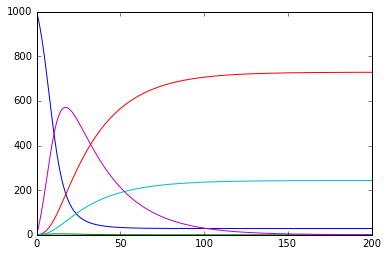

In [18]:
S  = 999.0
I = 1.0
R = 0.0
D = 0.0
Q = 0.0

beta = 0.3 # S -> I
gamma = 0.02 # I -> R
delta = 0.002 # R -> S
greekLetter = .06 #I -> Q
greekLetter2 = 0.03 #S -> Q
neptune = .01 #quarentine to death OR infected to death
qTOr = .03

N = S + I + R + D + Q

def sir(u,t):
    s, i, r, d, q = u
    ds = -beta * s * i / N + delta * i - greekLetter2 * s * i
    di = +beta * s * i /N - gamma * i - greekLetter * i - neptune * i
    dr = +gamma * i - delta * i + qTOr * q
    dd = +neptune * i + neptune * q
    dq = +greekLetter * i - qTOr * q - neptune * q + greekLetter2 * s * i
    return [ds, di, dr, dd, dq]

init = [S, I, R, D, Q]
xs = np.linspace(0, 200, 200)

ys = rk4(sir, init, xs)
print(beta / gamma)


plt.plot(xs, ys)
    

Quarentine - take infected poeple and ensure that they don't infect people until they have fully recovered. 

15.0


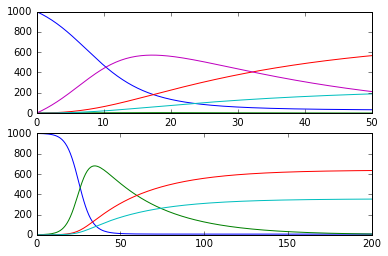

In [13]:
from scipy.integrate import odeint
N2 = S + I + R + D

def sir2(u,t):
    s, i, r, d = u
    ds = -beta * s * i / N2 + delta * i
    di = +beta * s * i /N2 - gamma * i  - neptune * i
    dr = +gamma * i - delta * i
    dd = +neptune * i
    return [ds, di, dr, dd]

init2 = [S, I, R, D]
xs2 = np.linspace(0, 200, 200)

ys2 = odeint(sir2, init2, xs2)
print(beta / gamma)

xs = np.linspace(0, 50, 200)

ys = odeint(sir, init, xs)

plt.figure(1)
plt.subplot(211)
plt.plot(xs, ys)

plt.subplot(212)

plt.plot(xs2, ys2)

[ 79.00279074]


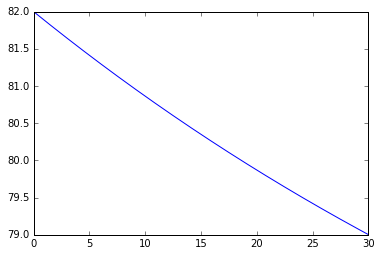

In [14]:
H = .0135 #constant
U = 82.0 #body temp
S = 73.0 #room temp

def newt(u,t):
    u2 = u[0]
    di = -H*(u2 - S)
    return [di]

init = [U]
xs = np.linspace(0, 30, 200)

ys = odeint(newt, init, xs)

print(ys[-1])

plt.plot(xs, ys)

[ 81.99206441]


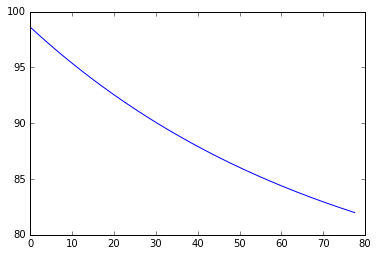

In [15]:
H = .0135 #constant
U = 98.6 #body temp
S = 73.0 #room temp

timetotal = 77.5

def newt(u,t):
    u2 = u[0]
    di = -H*(u2 - S)
    return [di]

init = [U]
xs = np.linspace(0, timetotal, 200)

ys = odeint(newt, init, xs)

print(ys[-1])

plt.plot(xs, ys)

[ 82.04815394]


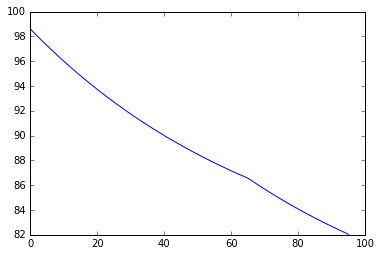

In [16]:
H = .0135 #constant
U = 98.6 #body temp
S = 73.0 #room temp

timetotal = 95

def time(t):
    if t < timetotal-30:
        return 78
    else:
        return 73
        
        
def newt(u,t):
    u2 = u[0]
    di = -H*(u2 - time(t))
    return [di]

init = [U]
xs = np.linspace(0, timetotal, 200)

ys = odeint(newt, init, xs)

print(ys[-1])

plt.plot(xs, ys)

[ 80.26411575  68.0000001 ]


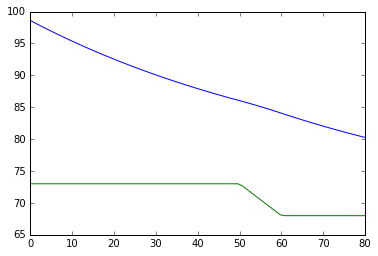

In [17]:
H = .0135 #constant
U = 98.6 #body temp
S = 73.0 #room temp

#instant = 95

timetotal = 80

changeOverTime = (78-S)/10


def time(t):
    if t < timetotal-30:
        return 78
    else:
        if t >= timetotal - 30 and t <= timetotal - 20:
            return 73 + (t-timetotal)*changeOverTime
        else:
            return 73

def change(t):
    if t >= timetotal - 30 and t <= timetotal - 20:
        return -changeOverTime
    else:
        return 0
        
def newt(u,t):
    u2, s = u
    di = -H*(u2 - s)
    ds = change(t)
    return [di, ds]

init = [U, S]
xs = np.linspace(0, timetotal, timetotal)

ys = odeint(newt, init, xs)

print(ys[-1])

plt.plot(xs, ys)